# Deep Neural Networks 
## Lecture 03

## Implementation of Perceptron


## 1. Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
%matplotlib inline

## 2. Setup Global Parameters

In [75]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10001  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')


## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:white;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [76]:
X,y = datasets.make_moons(n_samples=N_SAMPLES,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)
X.shape,y.shape

((1000, 2), (1000,))

## 4. Visualization
<p style="font-family: Arial; font-size:1.2em;color:white;">
DataFrames are easier to visualize
</p>

In [77]:
data_df=pd.DataFrame(X,columns=['A','B'])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [78]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [79]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [80]:
data_df['target'].unique()

array([0, 1])

### 4.1 Different ways of plotting data

<Axes: xlabel='A', ylabel='B'>

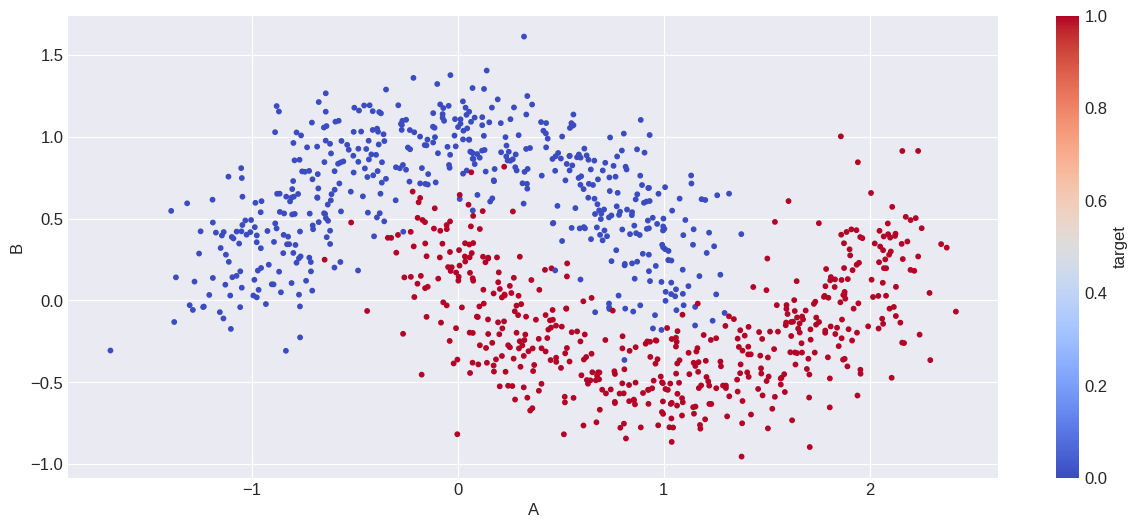

In [81]:
data_df.plot.scatter('A','B',s=10,c='target',cmap=CMAP)

<Axes: xlabel='target'>

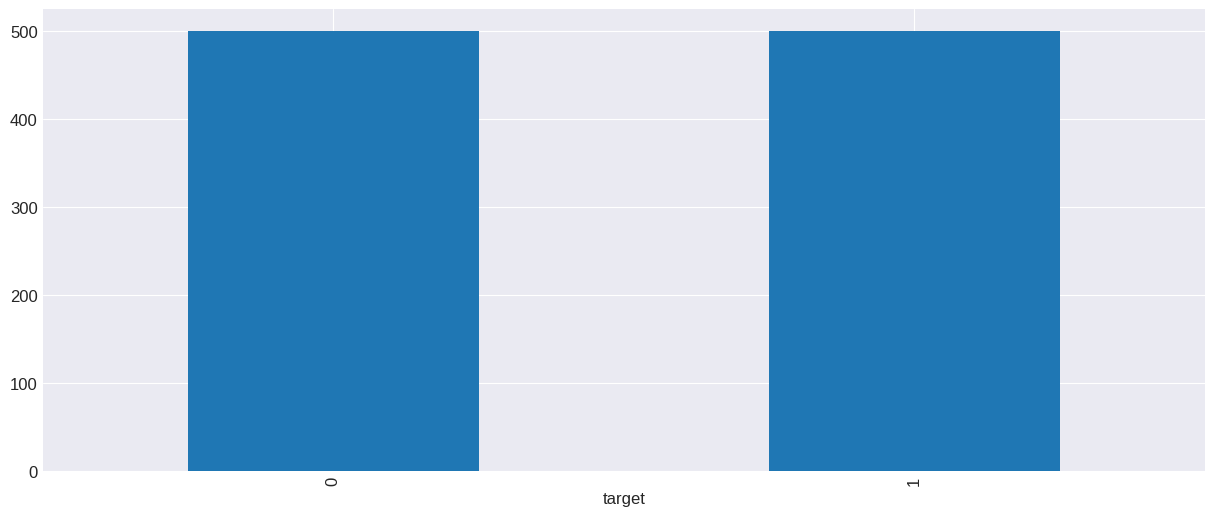

In [82]:
data_df['target'].value_counts().plot(kind='bar')

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


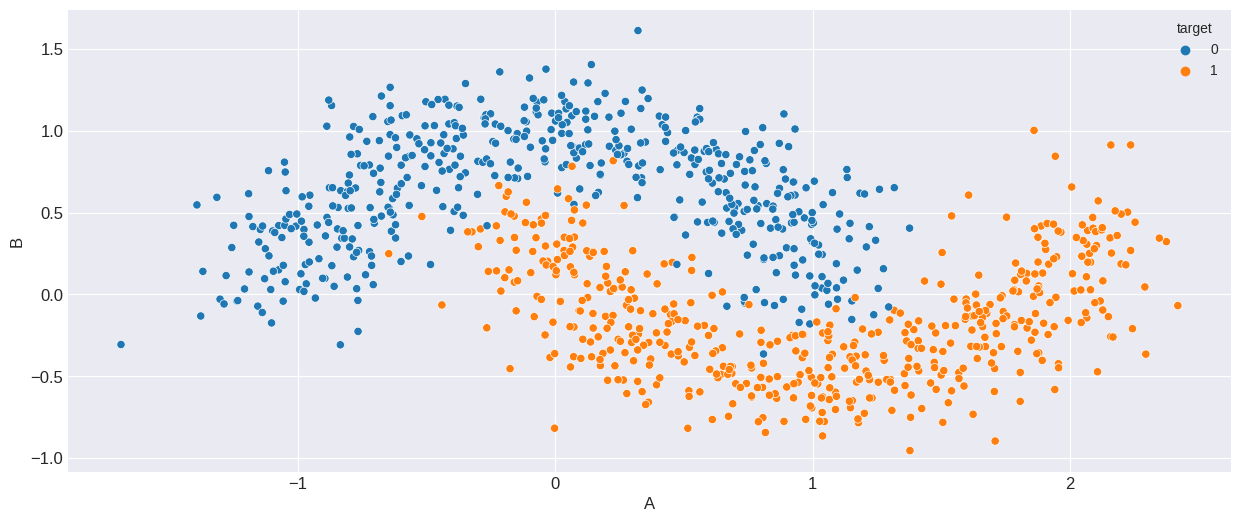

In [83]:
sns.scatterplot(x='A',y='B',data=data_df,hue='target');

<div style="font-family: Arial; font-size:1.2em;">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training. Note that the data is already random.
</div>

In [84]:


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,stratify=y,random_state=RANDOM_STATE)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

# Over to Perceptron

<div style="font-family: Arial; font-size:1.1em;">

Our output is binary. To keep the code in line with what we discussed in the lecture, we will simply output 1 for positive values of 'z' and zero for negative values.
</div>

<img src="images/dnn_nb_s03_fig1.png" width='350' align = 'left'>


$$
\begin{aligned}
z & = 1.0 \circ w_0 + x_1 \circ w_1 + x_2 \circ w_2 \\
\mathrm{or}\\
z & = X\circ W \\
\end{aligned}
$$
<br/>


$$
\begin{equation*}
    \hat{y} = \begin{cases}
      1.0, & \text{for z>=0}\  \\
      0.0, & \text{for z<0}\
    \end{cases}
\end{equation*}
$$

<div style="font-family: Arial; font-size:1em;">
<p>
As we know that adjustments in the weights are (a-$\hat{y}$). We don't want to adjust by full value. It makes convergence easier if we adjust by a small fraction. </p>
    <p><b>Why?</b> We would know better all through this module. We will circle back to learning_rate after some sessions.
<p>Let's assume that adjusting weights by $\alpha$ * ( a - $\hat{y}$ ) makes better sense. </p>
<p>
    <strong>Note:</strong> Take learning_rate ($\alpha$) as some constant.
</p>
</div>

### Sigmoid Function

In [85]:
def fn_sigmoid(z):
    return 1/(1+np.exp(-z))

### Tanh Activation Function

In [86]:
def fn_actv(z):
    return np.tanh(z)
def fn_actv_prime(a):
    return 1- np.tanh(a)**2

In [87]:
fn_actv(np.array([[-1,0,1],[-np.inf,0,np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [88]:
np.tanh(0.5)

0.46211715726000974

In [89]:
fn_actv_prime(0.5)

0.7864477329659274

## 5. Prediction

In [90]:
# a function to make prediction
def predict(model,X):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #### Forward Propagation
    ## Layer 1
    z1=X.dot(W1)+b1  #Aggregation Fn
    a1=fn_actv(z1)   #Activation Fn
        
    ## Layer 2
    z2=a1.dot(W2)+b2  #Aggregation Fn
    a2=fn_sigmoid(z2)    #Activation Fn
    
    return a2 >= 0.5 

In [91]:
# # A function to make predictions
# def predict(row,wt):
#     z=wt[0]
#     for i in range(len(row)-1):
#         z=wt[i+1]*row[i]+z # update fro w1 and w2
#     return fn_sigmoid(z) # change for sigmoid fuction


**Its advisable to test the function**

In [92]:
# #Unit test
# weights = np.array([0.1, 2.0, 1.0])

# display(data_df.loc[0])

# predict(data_df.loc[0].values, weights)

In [93]:
def calculate_loss(model,X,y):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    m=X.shape[0]
    #### Forward Propagation
    ## Layer 1
    z1=X.dot(W1)+b1  #Aggregation Fn
    a1=fn_actv(z1)   #Activation Fn
        
    ## Layer 2
    z2=a1.dot(W2)+b2  #Aggregation Fn
    a2=fn_sigmoid(z2)    #Activation Fn
    
    data_loss=-(y*np.log(a2)).sum()
    
    return 1./m * data_loss

<div style="font-family: Arial; font-size:1.2em;">
    <h3>Back-propagation - Estimate Perceptron weights </h3>
    $
\begin{aligned}
\partial{z}  & = a - y \\
\partial{b}  & = \partial{z} \\
\partial{w_1}  & = x_1 \circ \partial{z}\\
\partial{w_2}  & = x_2 \circ \partial{z}\\
\end{aligned}
$
    <hr>
      $
\begin{aligned}
b & = b -  \frac{1}{m} (\alpha \circ \partial{b}) \\
w_1  & = w_1 - \frac{1}{m}(\alpha \circ \partial{w_1} )\\
w_2  & = w_2 - \frac{1}{m}(\alpha \circ \partial{w_2} )\\
\end{aligned}
$
    </div>
    


 ## 6. Training

In [94]:
# function to train the model
def build_model(X,y,alpha=ALPHA,epochs=EPOCHS):
    
    W1=np.random.rand(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    W2=np.random.rand(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)

    b1=np.zeros((1,nn_hdim))
    b2=np.zeros((1,nn_output_dim))
    
    curr_loss=0
    loss,epoch=[],[]
    
    m=X.shape[0]
    
    for i in range(epochs):
        
        #### Forward Propagation
        ## Layer 1
        z1=X.dot(W1)+b1  #Aggregation Fn
        a1=fn_actv(z1)   #Activation Fn
        
        ## Layer 2
        z2=a1.dot(W2)+b2  #Aggregation Fn
        a2=fn_sigmoid(z2)    #Activation Fn
        
        #### Back Propagation
        dz2=a2-y
        assert(z2.shape==dz2.shape),f'error z2 {z2.shape}/{dz2.shape}'
        
        dW2=a1.T.dot(dz2)
        assert(W2.shape==dW2.shape),f'error W2 {W2.shape}/{dW2.shape}'
        
        db2=np.sum(dz2,axis=0,keepdims=True)
        assert(b2.shape==db2.shape),f'error b2 {b2.shape}/{db2.shape}'
        
        da1=dz2.dot(W2.T)
        
        #Layer 1
        dz1=da1*fn_actv_prime(z1)
        
        dW1=(X.T).dot(dz1)
        assert(W1.shape==dW1.shape),f'error W1 {W1.shape}/{dW1.shape}'
        
        db1=np.sum(dz1,axis=0,keepdims=True)
        assert(b1.shape==db1.shape),f'error b1 {b1.shape}/{db1.shape}'
        
        W1+= -alpha*dW1/m    #Gradient update
        W2+= -alpha*dW2/m    #Gradient update
        b1+= -alpha*db1/m    #Gradient update
        b2+= -alpha*db2/m    #Gradient update
    
        model ={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
        
        if i%100==0:
            curr_loss=calculate_loss(model,X,y)
            loss.append(curr_loss)
            epoch.append(i)
            print(f'epoch:{i};current_loss={curr_loss:.4f}')
    
    hist['loss']=loss
    hist['epoch']=epoch
    
        
    return model

In [95]:
nn_input_dim = X_train.shape[1]
nn_hdim = 4
nn_output_dim =1

hist = {}

In [96]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [97]:
model = build_model(X_train, y_train,
                    epochs = EPOCHS, 
                    alpha = ALPHA)

epoch:0;current_loss=0.3055
epoch:100;current_loss=0.2568
epoch:200;current_loss=0.1963
epoch:300;current_loss=0.1635
epoch:400;current_loss=0.1528
epoch:500;current_loss=0.1492
epoch:600;current_loss=0.1470
epoch:700;current_loss=0.1446
epoch:800;current_loss=0.1417
epoch:900;current_loss=0.1380
epoch:1000;current_loss=0.1335
epoch:1100;current_loss=0.1285
epoch:1200;current_loss=0.1233
epoch:1300;current_loss=0.1181
epoch:1400;current_loss=0.1131
epoch:1500;current_loss=0.1084
epoch:1600;current_loss=0.1040
epoch:1700;current_loss=0.1000
epoch:1800;current_loss=0.0962
epoch:1900;current_loss=0.0927
epoch:2000;current_loss=0.0894
epoch:2100;current_loss=0.0863
epoch:2200;current_loss=0.0833
epoch:2300;current_loss=0.0803
epoch:2400;current_loss=0.0774
epoch:2500;current_loss=0.0744
epoch:2600;current_loss=0.0714
epoch:2700;current_loss=0.0685
epoch:2800;current_loss=0.0655
epoch:2900;current_loss=0.0627
epoch:3000;current_loss=0.0600
epoch:3100;current_loss=0.0574
epoch:3200;current_l

In [98]:
model

{'W1': array([[ 2.91302954,  1.05001426,  3.59682418,  3.14161964],
        [-1.38246187, -0.77223687,  3.090008  , -1.17373297]]),
 'b1': array([[-3.7520007 ,  0.88007825, -2.33103334,  1.63210461]]),
 'W2': array([[ 6.15737039],
        [ 2.51120517],
        [-6.35969484],
        [ 4.66822448]]),
 'b2': array([[-0.50985665]])}

In [99]:
# # Function to train the model
# def train_weights(train,alpha=ALPHA,n_epoch=EPOCHS):
#     errors=[]
#     weights=rng.random(train.shape[1])
#     m=train.shape[0]
    
#     for epoch in range(n_epoch):
#         sum_error=0
    
#         for row in train:
#             prediction=predict(row,weights)
#             dz=prediction-row[-1]  #(a-y)
#             error= -row[-1] * (np.log(prediction)) # change due to sigmoid fuction
#             sum_error+=error
#             weights[0]=weights[0]-alpha*dz/m
#             for i in range(len(row)-1):
#                 weights[i+1] = weights[i+1] - alpha*dz*row[i]/m
#         errors.append(sum_error/m)
#     return errors,weights

In [100]:
# # calling 'train_weight'

# errors, weights = train_weights(data_train)
# print(weights)

In [101]:
# fig,ax=plt.subplots()
# ax.plot(hist);

## Question
<div style="font-family: Arial; font-size:1.2em;">
Why do we keep training and not stop at min training error? Hold on! We would get to that eventually.
</div>

## 7. Predictions

### Train Set

In [116]:
# predictions = []
# for row in X_train: # iterate over all rows
#     prediction = predict(model,X) # make predcition
#     if prediction >0.5:
#         y_pred =1
#     else:
#         y_pred = 0
        
#     predictions.append(y_pred) # calculate accuracy
    

In [112]:
model

{'W1': array([[ 2.91302954,  1.05001426,  3.59682418,  3.14161964],
        [-1.38246187, -0.77223687,  3.090008  , -1.17373297]]),
 'b1': array([[-3.7520007 ,  0.88007825, -2.33103334,  1.63210461]]),
 'W2': array([[ 6.15737039],
        [ 2.51120517],
        [-6.35969484],
        [ 4.66822448]]),
 'b2': array([[-0.50985665]])}

In [113]:
y_pred=predict(model,X_train) 
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

### Test Set

In [105]:
# predictions = []
# for row in data_test: # iterate over all rows
#     prediction = predict(row,weights) # make predcition
#     if prediction >0.5:
#         y_pred =1
#     else:
#         y_pred = 0
        
#     predictions.append(y_pred) # calculate accuracy

In [119]:
y_pred=predict(model,X_test) 
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [121]:
accuracy_score(y_test,y_pred) 

0.965

In [122]:
def fn_plot_decision_boundary(pred_func,X_tr,y_tr,X_ts,y_ts):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X_tr : train feature matrix
           y_tr : train labels
           X_ts : test feature matrix
           y_ts : test labels
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    # contourf fills colour 
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )

    
    

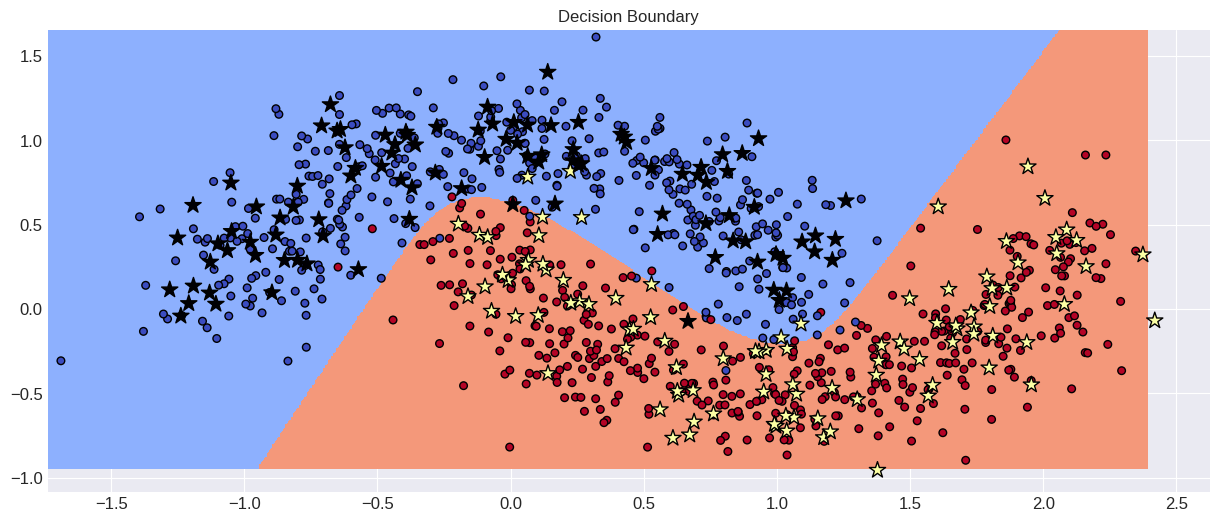

In [108]:
loss_df = pd.DataFrame(hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary");

## Tracking
<div style="font-family: Arial; font-size:1.2em;color:black;">
Lets track the results across various implementations...

 |#|Implementation|Training Accuracy|Testing Accuracy|Remarks|
 |:-:|---|---|---|---|
 |1|Simple Perceptron|0.83111|0.89000||

## Notes:
<img src="images/dnn_nb_s03_fig1.png" width='350' align = 'left'>
<img src="images/dnn_nb_s03_fig2.png" width='350' align = 'right'>

## A note on Loss Function
<div style="font-family: Arial; font-size:1.2em;">
    <p>In logistic regression we are looking for if it is correct class or not. </p> 
    <p>For example, we want to know if there is a car in the picture or not. So the output is probability of a car in the picture.</p>
    <p><b>Mathematically speaking:</b></p>
    <p>$\hat{y} = p(y=1|x)$ i.e. given training sample $x$, we want to know probability of $y$ being 1.</p>
    <br>
    <p><b>Alternatively:</b></p>
    <p>If there is a car in the picture.  $\Rightarrow$  $y$ = 1 then $p(y|x)$ = $\hat{y}$.</p>
    <p>If there is <b>no</b> car in the picture.$\Rightarrow$ $y$ = 0 then $p(y|x)$ = 1 - $\hat{y}$.</p>
    <br>
    <p>We can summarize two equations as: $p(y|x)$ = $\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}$</p>
    <p>Above equation is $\hat{y}$ for y = 1 and (1 - $\hat{y}$) for y = 0.</p>
    <p>Taking log of above equation:</p>

$
\begin{aligned}
log [ p(y|x) ] & = log[\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}]\\
& = y * log(\hat{y}) + (1-y) * log(1 - \hat{y})\\
\end{aligned}
$
<p>Since we aim to minimize above function, add negative sign and our loss function becomes</p>

$
\begin{aligned}
L(\hat{y},y) =  -[y * log\hat{y} + (1-y) * log(1-\hat{y})]\\
\text{or}\\
L(a,y) =  - [ y * log ( a ) + ( 1 - y ) * log( 1 - a ) ]\\
\end{aligned}
$

|Case| y |Loss| a |-log(a)|-log(1-a)|
|:-: |:-:|:-: |:-:|  :-: |   :-:  |
| 1  | 0 | -log( 1 - a )| 0.000001 |13.8155|**1 e-6**|
| 2  | 0 | -log( 1 - a )| 0.999999 |1 e-6|**13.8155**|
| 3  | 1 | -log( a )| 0.000001 |**13.8155**|1 e-6|
| 4  | 1 | -log( a )| 0.999999 |**1 e-6**|13.8155|

</div>

<div style="font-family: Arial; font-size:1.2em;">
    <p>For binary classification the error = - $y * log(a)$</p>
    <p>We want to sum it up for all samples in the dataset. Hence:</p>

$
\begin{aligned}
p(\text{all ys | all rows of x}) & =  \Pi_{i=0}^m p(y|x)\\
log [ p(\text{all ys | all rows of x})] & =  log [ \Pi_{i=0}^m p(y|x) ]\\
& =  \sum_{i=0}^m log [ p(y|x) ] \\
& =  \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\text{Divide it by m to better scale the costs}\\
& = \frac{1}{m} * \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\end{aligned}
$

### Introducing $\mathrm{sigmoid}$ function for our binary output.
$$
\begin{aligned}
z & = x_1 . w_1 + x_2 . w_2 + b_1 \\
a & = \hat{y} = \sigma(z)\\
dz & = (a - y) \\
db & = dz\\
b & = b - \alpha . db\\
dw_1 & = x_1. dz\\
dw_2 & = x_2.dz\\
w_1 & = w_1 - \alpha . dw_1\\
w_2 & = w_1 - \alpha . dw_2\\
\end{aligned}
$$
### Sigmoid function
$$
\begin{align}
a &= \sigma(z)\\
&= \dfrac{1}{1 + e^{-z}}\\
\end{align}
$$
    <h3>Derivative of sigmoid function</h3>
$$
\begin{align}
\partial{a} &= \partial{(\sigma(z))}\\
&= \dfrac{\partial}{\partial{z}} \left[ \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{\partial}{\partial{z}} \left( 1 + \mathrm{e}^{-z} \right)^{-1} \\
&= -(1 + e^{-z})^{-2}(-e^{-z}) \\
&= \dfrac{e^{-z}}{\left(1 + e^{-z}\right)^2} \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{e^{-z}}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{(1 + e^{-z}) - 1}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ \dfrac{1 + e^{-z}}{1 + e^{-z}} - \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ 1 - \dfrac{1}{1 + e^{-z}} \right] \\
&= \sigma(z) \circ (1 - \sigma(z))\\
&= a \circ (1 - a)
\end{align}
$$
    </div>